In [36]:
import os
from pathlib import Path

import pandas as pd
from matplotlib import pyplot as plt

# Get list of all CSV files in the directory
list_of_commits = list(Path("../../logs/performance/analysis").glob("*/"))
list_of_commits.sort(key=os.path.getmtime, reverse=True)
list_of_commits = list_of_commits[:1]
list_of_files = list(Path(list_of_commits[0] / "all").glob("*.csv"))

# Find the latest file
latest_file = max(list_of_files, key=os.path.getctime)

# Load the latest CSV file into a DataFrame
df_latest = pd.read_csv(latest_file)
# format: timestamp,category,test_name,query,scenario,execution_time,results_consistent,fainder_mode,num_results,ids,num_terms,id_str
print(df_latest)

# First check the unique category values to see what we're working with
print("Unique categories:", df_latest["category"].unique())

# Strip whitespace and normalize the category column
df_latest["category"] = df_latest["category"].str.strip()

os.makedirs("figures/analysis", exist_ok=True)

                timestamp                      category  \
0     2025-05-21 09:04:18          base_keyword_queries   
1     2025-05-21 09:04:18          base_keyword_queries   
2     2025-05-21 09:04:18          base_keyword_queries   
3     2025-05-21 09:04:18          base_keyword_queries   
4     2025-05-21 09:04:18          base_keyword_queries   
...                   ...                           ...   
1011  2025-05-21 15:06:49  double_expected_form_queries   
1012  2025-05-21 15:09:18  double_expected_form_queries   
1013  2025-05-21 15:09:18  double_expected_form_queries   
1014  2025-05-21 15:09:18  double_expected_form_queries   
1015  2025-05-21 15:09:18  double_expected_form_queries   

                    test_name  \
0            simple_keyword_1   
1            simple_keyword_1   
2            simple_keyword_1   
3            simple_keyword_1   
4            simple_keyword_1   
...                       ...   
1011  double_expected_form_10   
1012  double_expected_form_

In [37]:
# Filter the DataFrame by category with stripped values
base_keyword_queries = df_latest[df_latest["category"] == "base_keyword_queries"]
base_keyword_queries = base_keyword_queries[
    base_keyword_queries["results_consistent"]
].reset_index(drop=True)
base_keyword_queries_with_multiple_elements = df_latest[
    df_latest["category"] == "base_keyword_queries_with_multiple_elements"
]
base_keyword_queries_with_multiple_elements = base_keyword_queries_with_multiple_elements[
    base_keyword_queries_with_multiple_elements["results_consistent"]
].reset_index(drop=True)
base_percentile_queries = df_latest[df_latest["category"] == "base_percentile_queries"]
base_percentile_queries = base_percentile_queries[
    base_percentile_queries["results_consistent"]
].reset_index(drop=True)
percentile_combinations = df_latest[df_latest["category"] == "percentile_combinations"]
percentile_combinations = percentile_combinations[
    percentile_combinations["results_consistent"]
].reset_index(drop=True)
mixed_combinations_with_fixed_structure = df_latest[
    df_latest["category"] == "mixed_combinations_with_fixed_structure"
]
mixed_combinations_with_fixed_structure = mixed_combinations_with_fixed_structure[
    mixed_combinations_with_fixed_structure["results_consistent"]
].reset_index(drop=True)
mixed_combinations_with_fixed_structure_extented = df_latest[
    df_latest["category"] == "mixed_combinations_with_fixed_structure_extented"
]
mixed_combinations_with_fixed_structure_extented = mixed_combinations_with_fixed_structure_extented[
    mixed_combinations_with_fixed_structure_extented["results_consistent"]
].reset_index(drop=True)
early_exit = df_latest[df_latest["category"] == "early_exit"]
early_exit = early_exit[early_exit["results_consistent"]].reset_index(drop=True)
# Filter for multiple percentile combinations
multiple_percentile_combinations = df_latest[
    df_latest["category"] == "multiple_percentile_combinations"
]
multiple_percentile_combinations = multiple_percentile_combinations[
    multiple_percentile_combinations["results_consistent"]
].reset_index(drop=True)
multiple_percentile_combinations_with_kw = df_latest[
    df_latest["category"] == "multiple_percentile_combinations_with_kw"
]
multiple_percentile_combinations_with_kw = multiple_percentile_combinations_with_kw[
    multiple_percentile_combinations_with_kw["results_consistent"]
].reset_index(drop=True)
expected_form_not_queries = df_latest[
    df_latest["category"] == "expected_form_not_queries"
]
double_expected_form_queries = df_latest[
    df_latest["category"] == "double_expected_form_queries"
]
middle_exit = df_latest[df_latest["category"] == "middle_exit"]
middle_exit = middle_exit[middle_exit["results_consistent"]].reset_index(drop=True)

# Print to verify the filtering worked
print("\nCounts after fixing whitespace:")
print("Base keyword queries:", len(base_keyword_queries))
print("Base keyword queries with multiple elements:", len(base_keyword_queries_with_multiple_elements))
print("Base percentile queries:", len(base_percentile_queries))
print("Percentile combinations:", len(percentile_combinations))
print("Mixed combinations with fixed structure:", len(mixed_combinations_with_fixed_structure))
print("Mixed combinations with fixed structure extended:", len(mixed_combinations_with_fixed_structure_extented))
print("Early exit:", len(early_exit))
print("Multiple percentile combinations:", len(multiple_percentile_combinations))
print("Multiple percentile combinations with keyword:", len(multiple_percentile_combinations_with_kw))
print("Expected form not queries:", len(expected_form_not_queries))
print("Double expected form queries:", len(double_expected_form_queries))
print("Middle exit:", len(middle_exit))
# Prepare data for plotting
# Get unique scenarios and colors for plotting
scenarios = base_keyword_queries["scenario"].unique()
colors = ["r", "g", "b", "y", "c", "m", "k"]


Counts after fixing whitespace:
Base keyword queries: 80
Base keyword queries with multiple elements: 0
Base percentile queries: 64
Percentile combinations: 144
Mixed combinations with fixed structure: 80
Mixed combinations with fixed structure extended: 80
Early exit: 80
Multiple percentile combinations: 144
Multiple percentile combinations with keyword: 144
Expected form not queries: 120
Double expected form queries: 80
Middle exit: 0


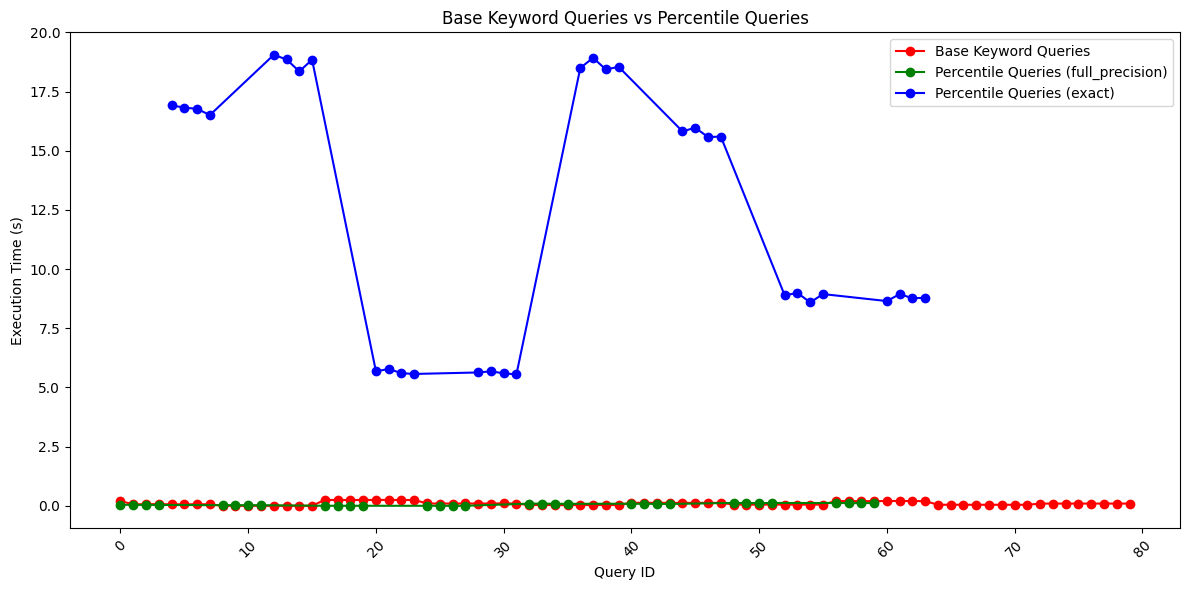

In [ ]:
# a plot with three lines (one base_keyword_queries and two percentile queries (different fainder modes)) x-axis is queryid
plt.figure(figsize=(12, 6))
plt.title("Base Keyword Queries vs Percentile Queries")
plt.xlabel("Query ID")
plt.ylabel("Execution Time (s)")

# Plot base keyword queries
plt.plot(
    base_keyword_queries.index,
    base_keyword_queries["execution_time"],
    label="Base Keyword Queries",
    color=colors[0],
    marker="o",
)
# Plot base percentile queries
fainder_modes = base_percentile_queries["fainder_mode"].unique()
for i, fainder_mode in enumerate(fainder_modes):
    percentile_queries = base_percentile_queries[base_percentile_queries["fainder_mode"] == fainder_mode]
    plt.plot(
        percentile_queries.index,
        percentile_queries["execution_time"],
        label=f"Percentile Queries ({fainder_mode})",
        color=colors[i + 1],
        marker="o",
    )
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig("figures/analysis/base_predicates.png")

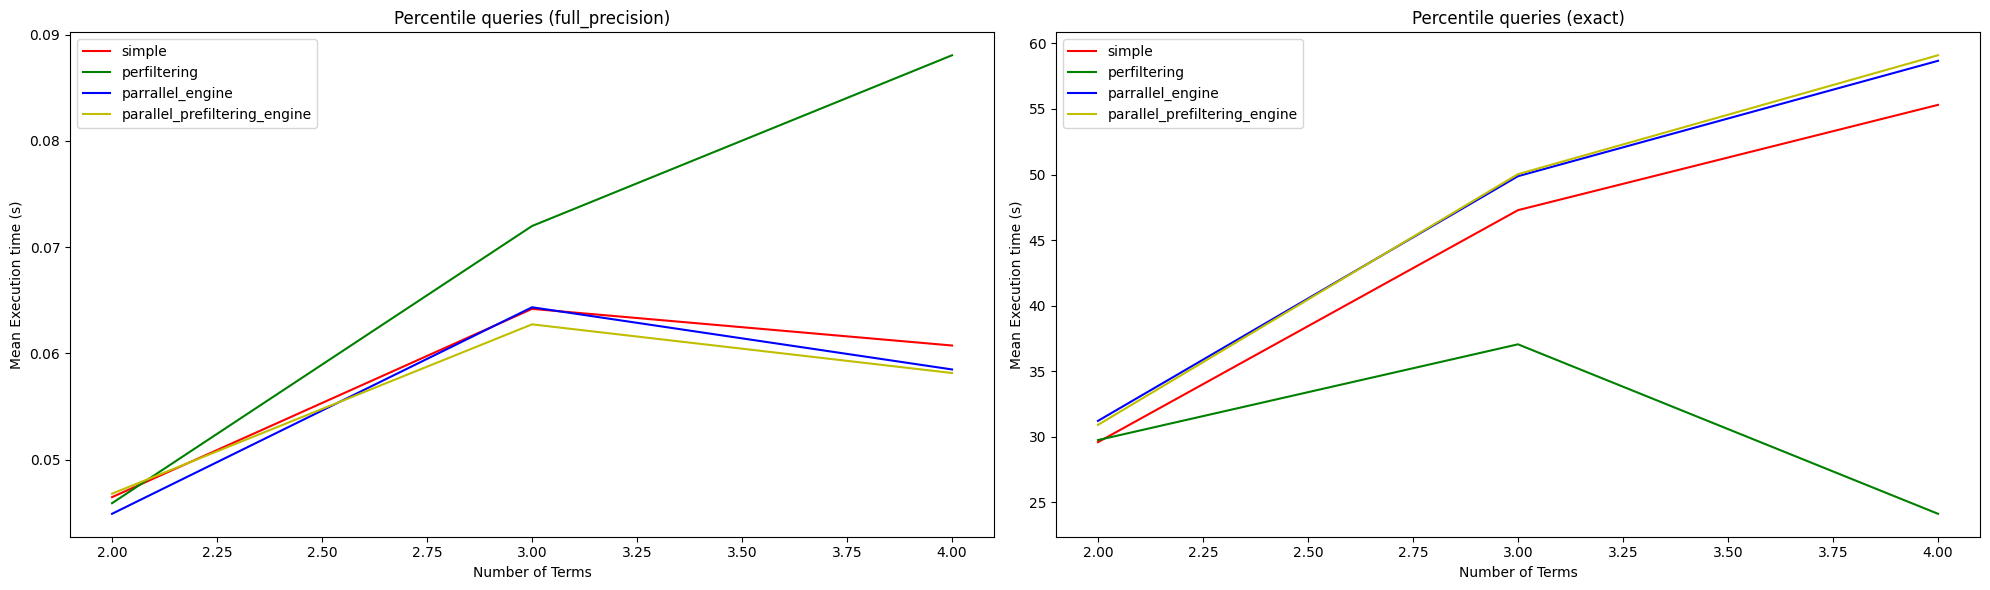

In [39]:
# plot percentile_combinations comparing different scenarios (per fainder mode)

fainder_modes = percentile_combinations["fainder_mode"].unique()
fig, axes = plt.subplots(1, len(fainder_modes), figsize=(20, 6))

for i, fainder_mode in enumerate(fainder_modes):
    df_mode = percentile_combinations[percentile_combinations["fainder_mode"] == fainder_mode]
    for j, scenario in enumerate(scenarios):
        df_scenario = df_mode[df_mode["scenario"] == scenario]
        mean_execution_times = df_scenario.groupby("num_terms")["execution_time"].mean()
        
        axes[i].plot(
            mean_execution_times.index,
            mean_execution_times.values,
            label=scenario,
            color=colors[j % len(colors)]
        )
    
    axes[i].set_xlabel("Number of Terms")
    axes[i].set_ylabel("Mean Execution time (s)")
    axes[i].set_title(f"Percentile queries ({fainder_mode})")
    axes[i].legend()

plt.tight_layout()
plt.savefig("figures/analysis/percentile_combinations.png")
plt.show()



/tmp/ipykernel_22523/63495720.py:20: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


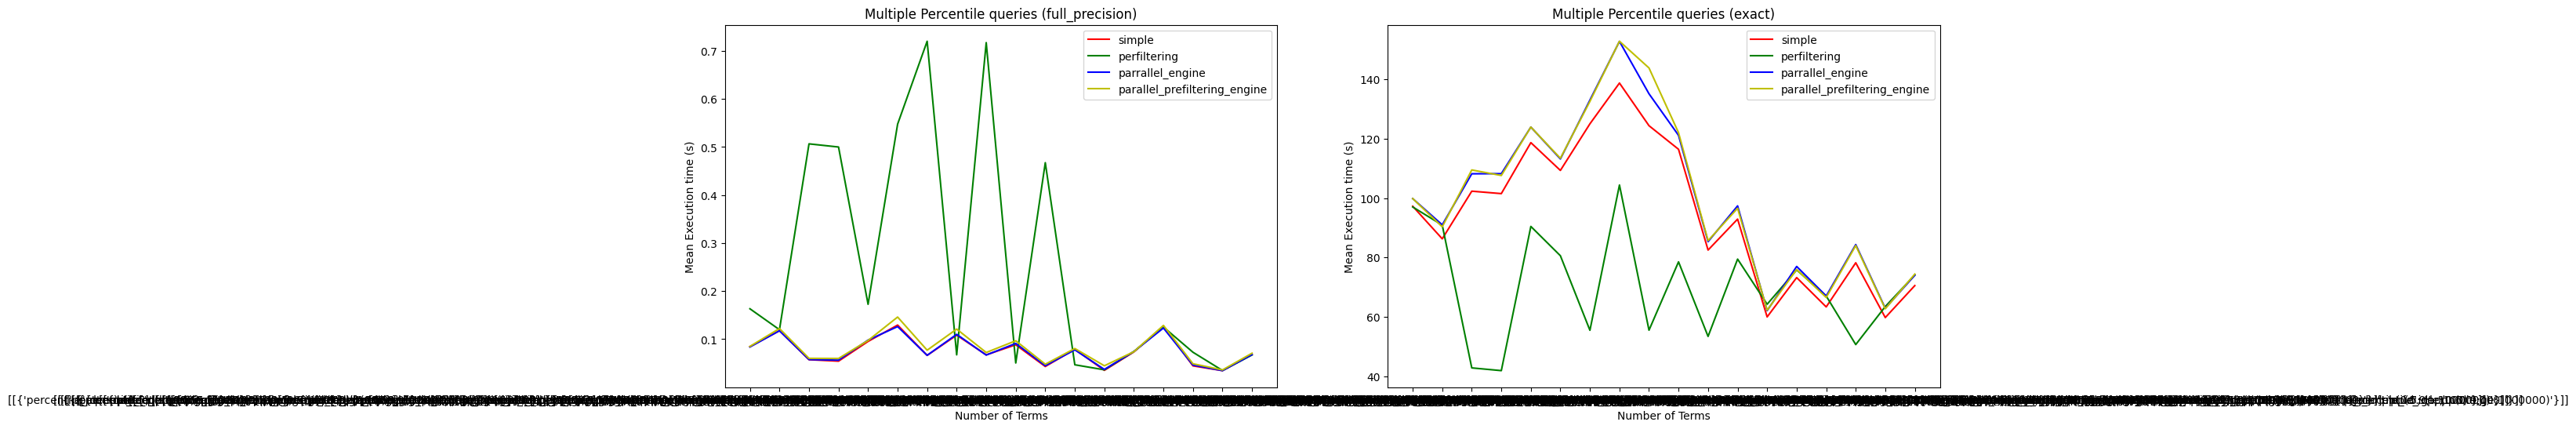

In [40]:
# plot multiple multiple_percentile_combinations comparing different scenarios (per fainder mode)
fig, axes = plt.subplots(1, len(fainder_modes), figsize=(20, 6))
for i, fainder_mode in enumerate(fainder_modes):
    df_mode = multiple_percentile_combinations[multiple_percentile_combinations["fainder_mode"] == fainder_mode]
    for j, scenario in enumerate(scenarios):
        df_scenario = df_mode[df_mode["scenario"] == scenario]
        mean_execution_times = df_scenario.groupby("ids")["execution_time"].mean()
        
        axes[i].plot(
            mean_execution_times.index,
            mean_execution_times.values,
            label=scenario,
            color=colors[j % len(colors)]
        )
    
    axes[i].set_xlabel("Number of Terms")
    axes[i].set_ylabel("Mean Execution time (s)")
    axes[i].set_title(f"Multiple Percentile queries ({fainder_mode})")
    axes[i].legend()
plt.tight_layout()
plt.savefig("figures/analysis/multiple_percentile_combinations.png")
plt.show()


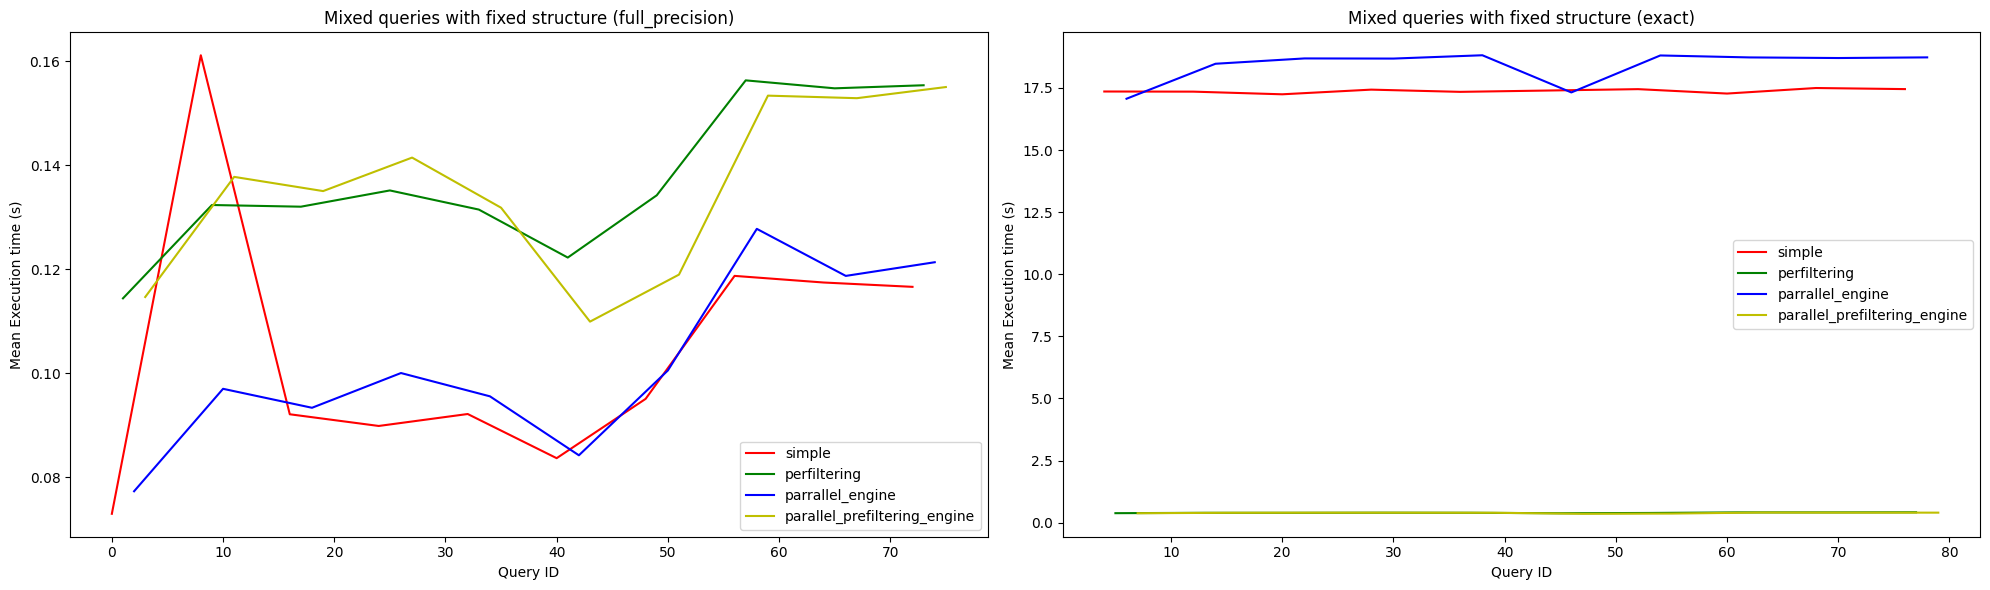

In [41]:
# plot mixed_combinations_with_fixed_structure comparing different scenarios (per fainder mode)
fainder_modes = mixed_combinations_with_fixed_structure["fainder_mode"].unique()
fig, axes = plt.subplots(1, len(fainder_modes), figsize=(20, 6))

for i, fainder_mode in enumerate(fainder_modes):
    df_mixed = mixed_combinations_with_fixed_structure[
        mixed_combinations_with_fixed_structure["fainder_mode"] == fainder_mode
    ]
    for h, scenario in enumerate(scenarios):
        mean_execution_times = df_mixed[df_mixed["scenario"] == scenario]

        axes[i].plot(
            mean_execution_times.index,
            mean_execution_times["execution_time"],
            label=scenario,
            color=colors[h],
        )
    axes[i].set_xlabel("Query ID")
    axes[i].set_ylabel("Mean Execution time (s)")
    axes[i].set_title(f"Mixed queries with fixed structure ({fainder_mode})")
    axes[i].legend()

plt.tight_layout()
plt.savefig("figures/analysis/mixed_combinations_with_fixed_structure.png")
plt.show()

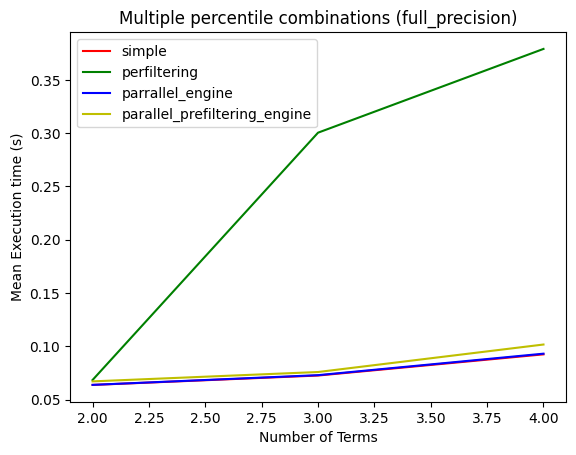

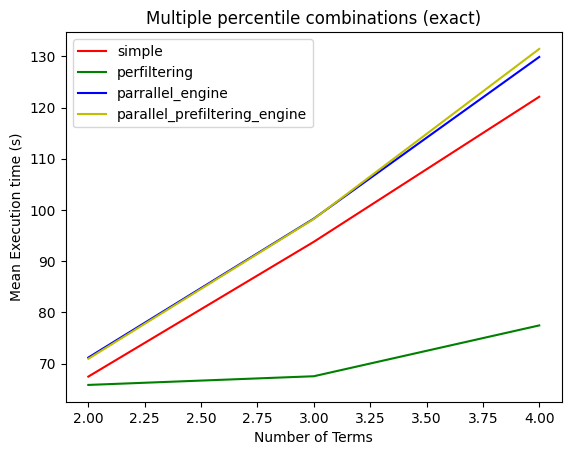

In [42]:
# plot multiple_percentile_combinations comparing different scenarios (per fainder mode)
fainder_modes = multiple_percentile_combinations["fainder_mode"].unique()

for _, fainder_mode in enumerate(fainder_modes):
    df = multiple_percentile_combinations[
        multiple_percentile_combinations["fainder_mode"] == fainder_mode
    ]
    plt.figure()
    for h, scenario in enumerate(scenarios):
        df_multiple = df[df["scenario"] == scenario]

        mean_execution_times = df_multiple.groupby("num_terms")["execution_time"].mean()
        plt.plot(
            mean_execution_times.index,
            mean_execution_times.values,
            label=scenario,
            color=colors[h],
        )
    plt.xlabel("Number of Terms")
    plt.ylabel("Mean Execution time (s)")
    plt.title("Multiple percentile combinations" + " (" + fainder_mode + ")")
    plt.legend()
plt.show()

Text(0.5, 1.0, 'Base Queries Execution Time')

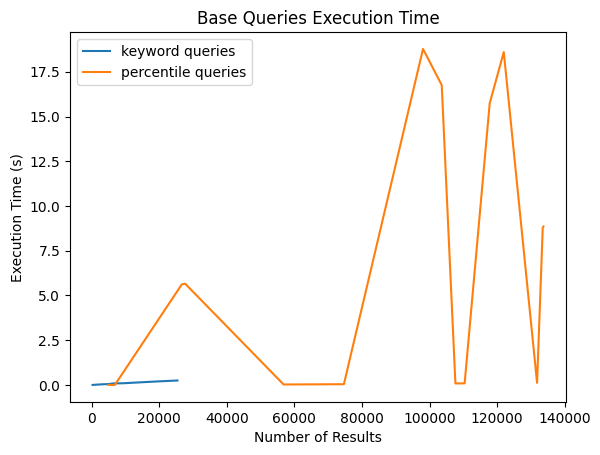

In [43]:
# compare kw vs pp time for base queries (for cost based optimization)

# relevant columns: execution_time number_of_results (seneario is irrelevant for base queries)
plt.figure()

df = base_keyword_queries.groupby("num_results")["execution_time"].mean()

plt.plot(df.index, df, label="keyword queries")

df = base_percentile_queries.groupby("num_results")["execution_time"].mean()

plt.plot(df.index, df, label="percentile queries")

plt.xlabel("Number of Results")
plt.ylabel("Execution Time (s)")
plt.legend()
plt.title("Base Queries Execution Time")

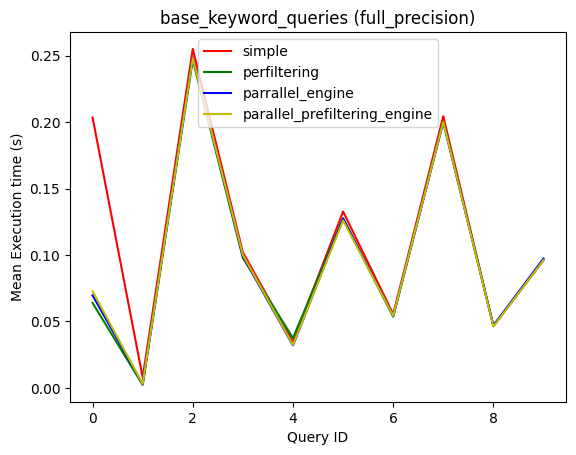

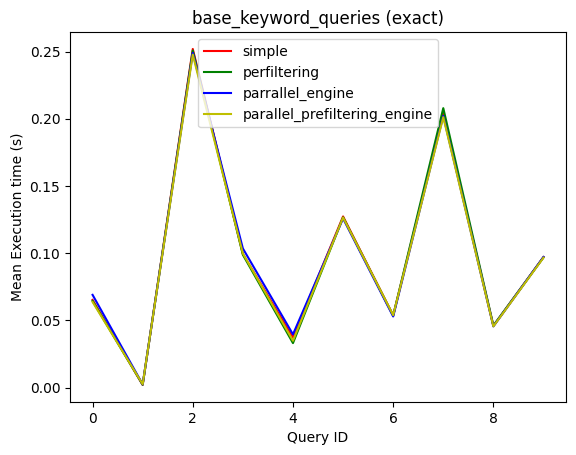

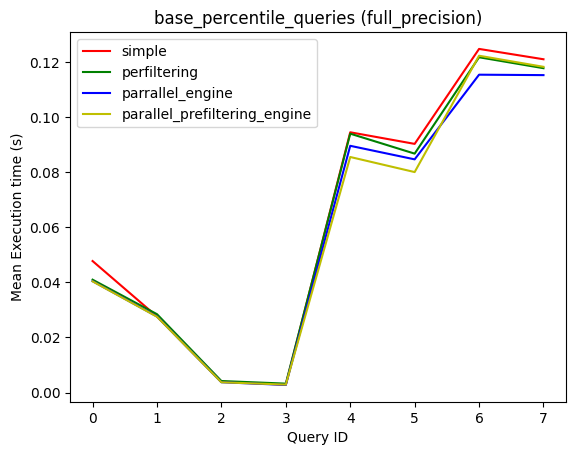

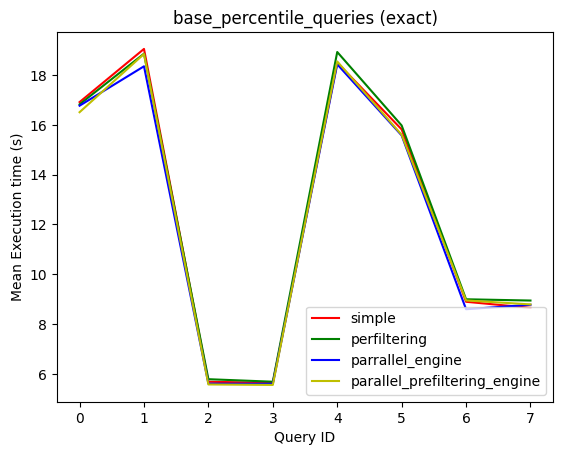

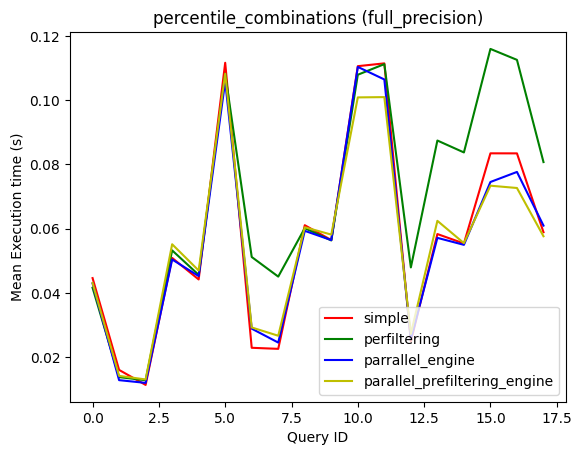

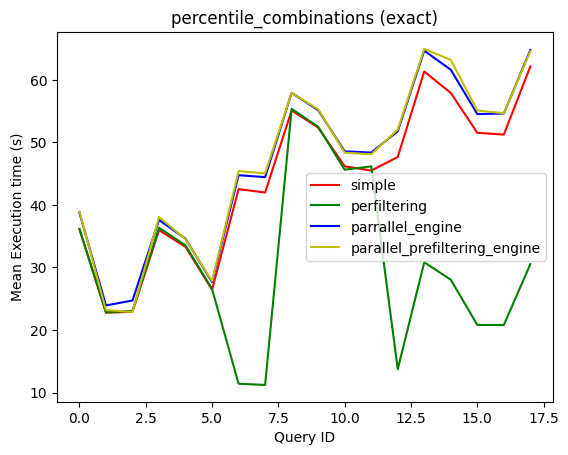

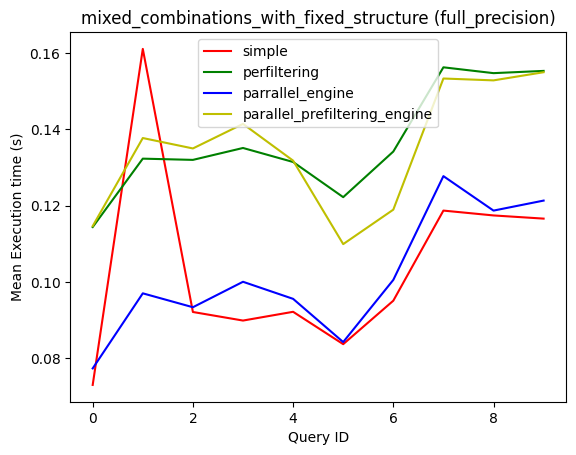

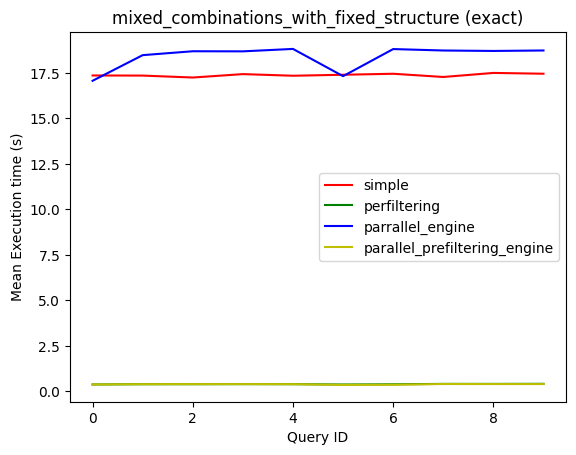

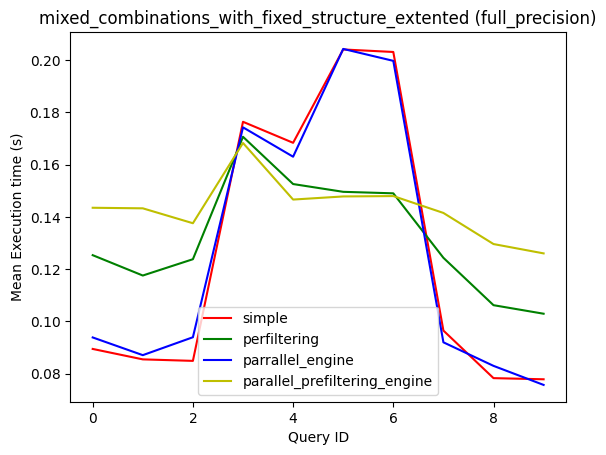

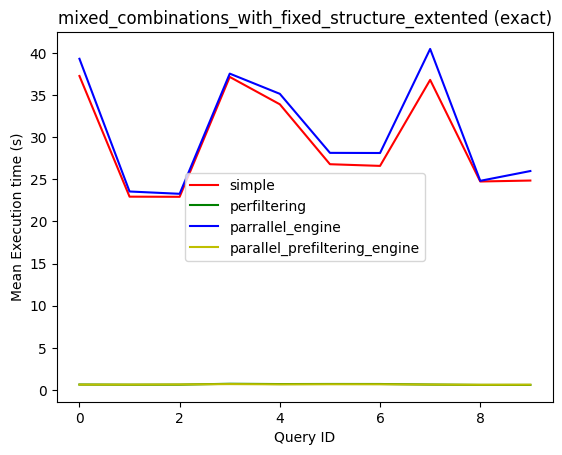

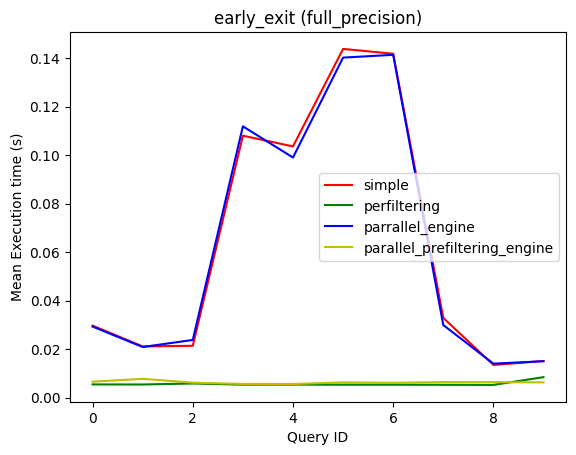

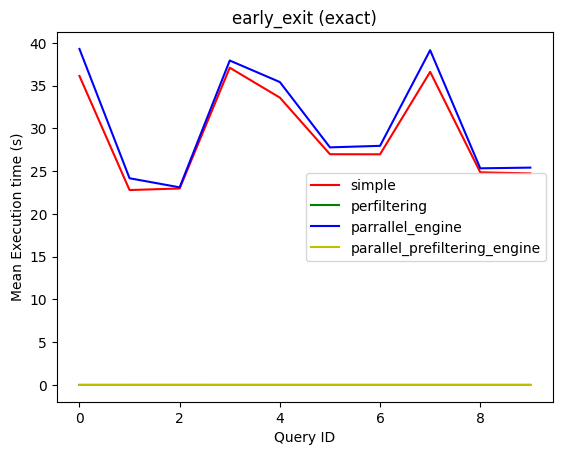

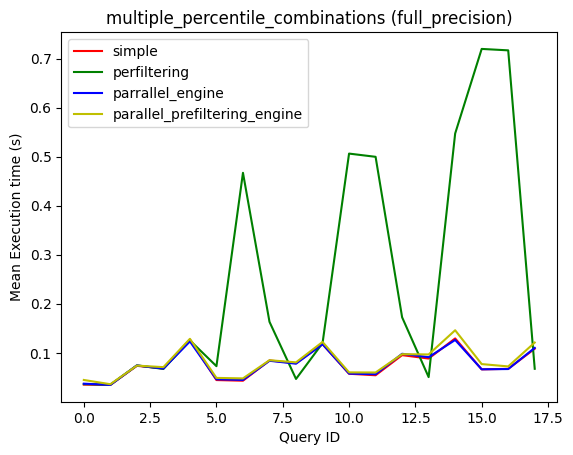

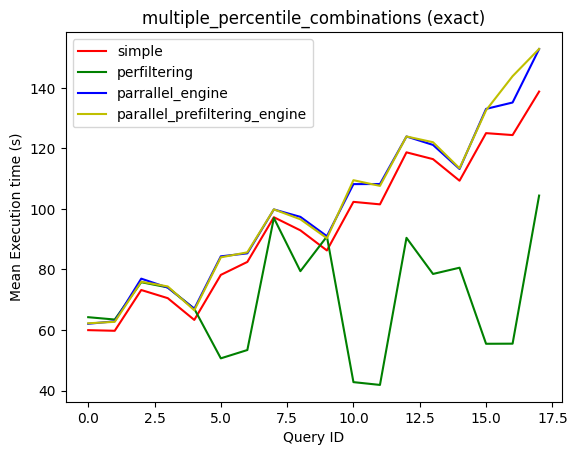

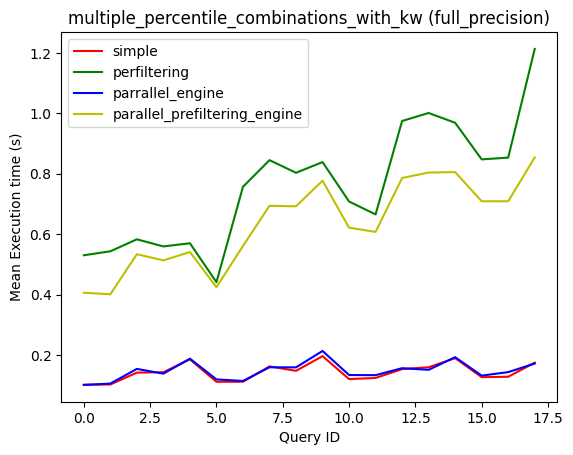

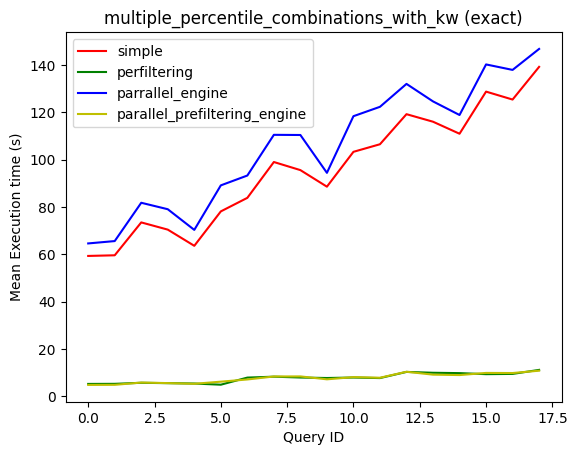

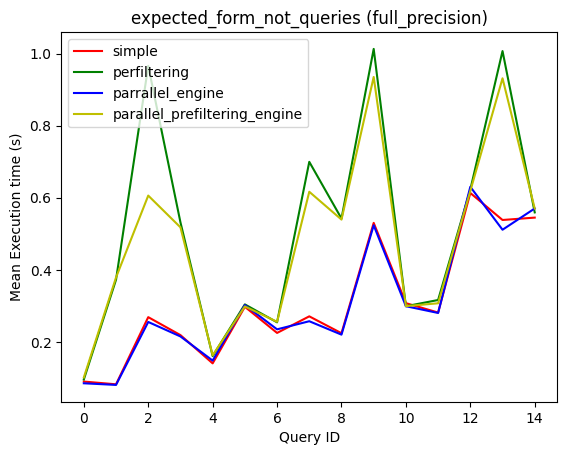

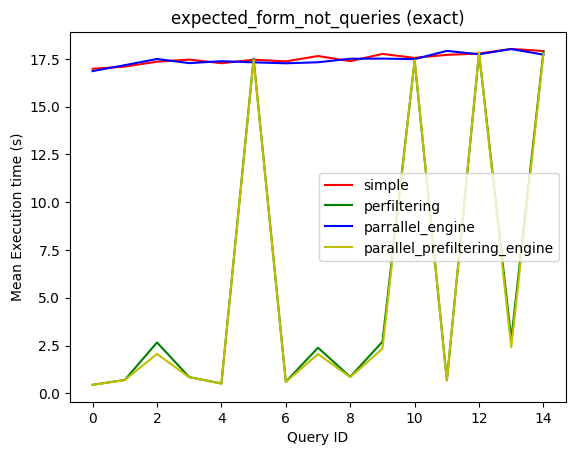

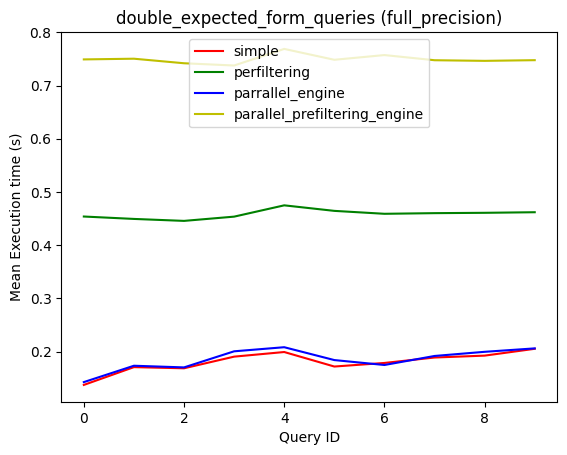

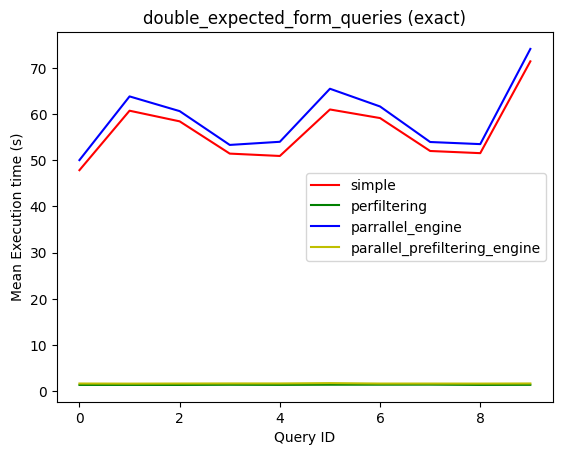

In [44]:
# Compare the execution time (y-axis) per query (x-axis) (one line per scenario)
# new plot per fainder mode per category
fainder_modes = df_latest["fainder_mode"].unique()

for category in df_latest["category"].unique():
    for fainder_mode in fainder_modes:
        plt.figure()
        df = df_latest[df_latest["fainder_mode"] == fainder_mode]
        df = df[df["category"] == category]
        for i, scenario in enumerate(scenarios):
            df_scenario = df[df["scenario"] == scenario]

            df_scenario = df_scenario.reset_index()

            plt.plot(
                df_scenario.index,
                df_scenario["execution_time"],
                label=scenario,
                color=colors[i],
            )

        plt.xlabel("Query ID")
        plt.ylabel("Mean Execution time (s)")
        plt.title(f"{category} ({fainder_mode})")
        plt.legend()
        plt.savefig(f"figures/analysis/{category}_{fainder_mode}.png")


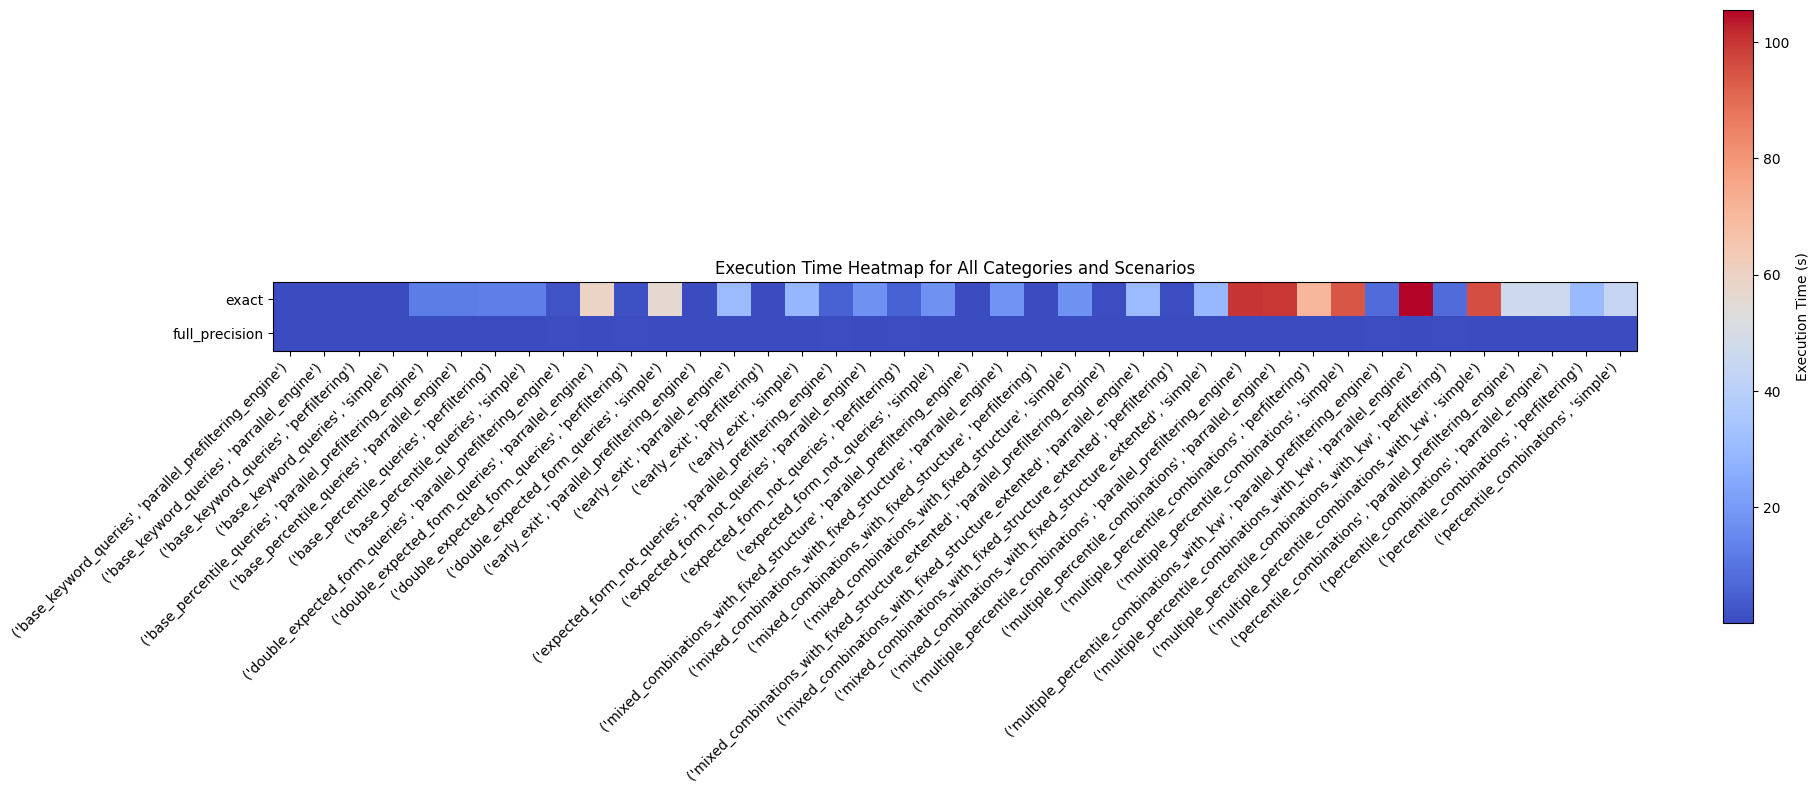

<Figure size 640x480 with 0 Axes>

In [45]:
# compact heatmap for all categories and scenarios 
def create_heatmap(df, title):
    pivot_table = df.pivot_table(
        index="fainder_mode", columns=["category", "scenario"], values="execution_time", aggfunc="mean"
    )
    plt.figure(figsize=(20, 8))  # Increased figure width
    plt.imshow(pivot_table, cmap="coolwarm", interpolation="nearest")
    plt.colorbar(label="Execution Time (s)")
    
    # Rotate and align the tick labels so they look better
    plt.xticks(range(len(pivot_table.columns)), pivot_table.columns, rotation=45, ha='right')
    plt.yticks(range(len(pivot_table.index)), pivot_table.index)
    
    # Add some spacing between the plot and the labels
    plt.tight_layout()
    
    plt.title(title)
    plt.show()
    plt.savefig(f"figures/analysis/{title}.png")

# Create heatmap for all categories and scenarios
create_heatmap(df_latest, "Execution Time Heatmap for All Categories and Scenarios")